⚙️ Step 1 – Install & Import

In [1]:
!pip install scikit-learn numpy --quiet


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


📊 Step 2 – Prepare Data for Model


In [11]:
def prepare_ml_data(df, window_size=5):
    """
    Create feature windows and targets for next-day price prediction.
    """
    # Ensure close_prices is a 1D array, as df['Close'].values can sometimes return (N, 1)
    # if the column itself was selected as a DataFrame or from a MultiIndex structure.
    close_prices = df['Close'].values.ravel()
    X, y = [], []
    for i in range(window_size, len(close_prices)):
        X.append(close_prices[i-window_size:i])
        y.append(close_prices[i])
    return np.array(X), np.array(y)

🤖 Step 3 – Train and Predict

In [4]:
def train_predict_model(df):
    X, y = prepare_ml_data(df)

    # Split into training (80%) and testing (20%)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📈 MAE: {mae:.2f}, R²: {r2:.3f}")

    # Predict next day's price using last 5 days
    next_input = df['Close'].values[-5:].reshape(1, -1)
    next_pred = model.predict(next_input)[0]

    return y_test, y_pred, next_pred


📈 Step 4 – Visualize Prediction

In [5]:
def plot_prediction(df, y_test, y_pred):
    plt.figure(figsize=(10,5))
    test_dates = df['Date'].iloc[-len(y_test):]
    plt.plot(test_dates, y_test, label='Actual', linewidth=2)
    plt.plot(test_dates, y_pred, label='Predicted', linestyle='--', linewidth=2)
    plt.title("Predicted vs Actual Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.show()


🚀 Step 5 – Run it All

/tmp/ipython-input-2966859578.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


📈 MAE: 13.20, R²: 0.861


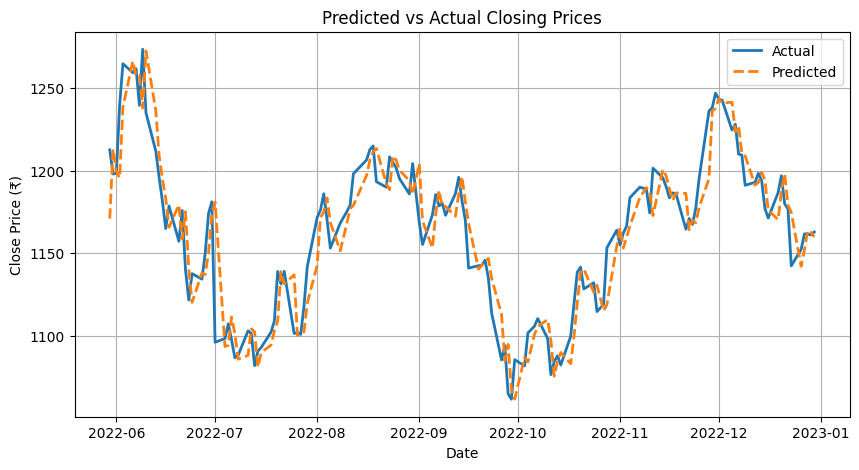

💡 Predicted next-day close for RELIANCE.NS: ₹1162.14


In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt # Needed for plot_prediction

# Define ticker and load data
ticker = "RELIANCE.NS" # Example ticker, can be changed
df = yf.download(ticker, start="2020-01-01", end="2023-01-01")
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date']) # Ensure Date column is datetime type for plotting

y_test, y_pred, next_price = train_predict_model(df)
plot_prediction(df, y_test, y_pred)

print(f"💡 Predicted next-day close for {ticker}: ₹{next_price:.2f}")